In [11]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

import math

def plot_images(img1, img2, label_1, label_2, graysc=True):
    # Plot the result (1 row with 2 images)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    f.tight_layout()
    if graysc:
        ax1.imshow(img1, cmap='gray')
    else:
        ax1.imshow(img1)
    ax1.set_title(label_1, fontsize=16)
    ax2.imshow(img2, cmap='gray')
    ax2.set_title(label_2, fontsize=16)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

def abs_sobel(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    img_trans = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    img_trans = img_trans[:,:,2]
    if orient == 'x':
        sobel = cv2.Sobel(img_trans, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(img_trans, cv2.CV_64F, 0, 1, ksize=sobel_kernel) 
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    img_trans = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    img_trans = img_trans[:,:,2]
    sobel_x = cv2.Sobel(img_trans, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img_trans, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobel_x**2 + sobel_y**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8)
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    img_trans = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    img_trans = img_trans[:,:,2]
    sobel_x = cv2.Sobel(img_trans, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img_trans, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    absgraddir = np.arctan2(abs_sobel_y, abs_sobel_x)
    binary_output = np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return binary_output

def combine_sobel_thresholds(img, do_plot=False):
    kernel_size = 5
    img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    ksize = 7
    grad_x_binary = abs_sobel(img, orient='x', sobel_kernel=ksize, thresh=(10, 255))
    grad_y_binary = abs_sobel(img, orient='y', sobel_kernel=ksize, thresh=(60, 255))
    mag_binary = mag_thresh(img, sobel_kernel=ksize, mag_thresh=(40, 255))
    dir_binary = dir_threshold(img, sobel_kernel=ksize, thresh=(0.65, 1.05))
    
    combined_img = np.zeros_like(dir_binary)
    combined_img[((grad_x_binary == 1) & (grad_y_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    
    plot_images(img, grad_x_binary,      'Original Image (Undistorted)', 'Sobel on x-axis')
    plot_images(grad_y_binary, mag_binary, 'Sobel on y-axis', 'Thresholded Magnitude')
    plot_images(dir_binary, combined_img,      'Direction of gradient', 'Combined Thresholds')
    return combined_img

from moviepy.editor import VideoFileClip
from IPython.display import HTML

def process_image(image):
    binary_img = combine_sobel_thresholds(image)
    result = binary_img
    return result



In [12]:
!rm output_images/challenge_video.mp4

rm: cannot remove 'output_images/challenge_video.mp4': No such file or directory


t:   0%|          | 0/3 [00:00<?, ?it/s, now=None]

Moviepy - Building video output_images/challenge_video.mp4.
Moviepy - Writing video output_images/challenge_video.mp4



Moviepy - Done !
Moviepy - video ready output_images/challenge_video.mp4
CPU times: user 928 ms, sys: 89.7 ms, total: 1.02 s
Wall time: 792 ms


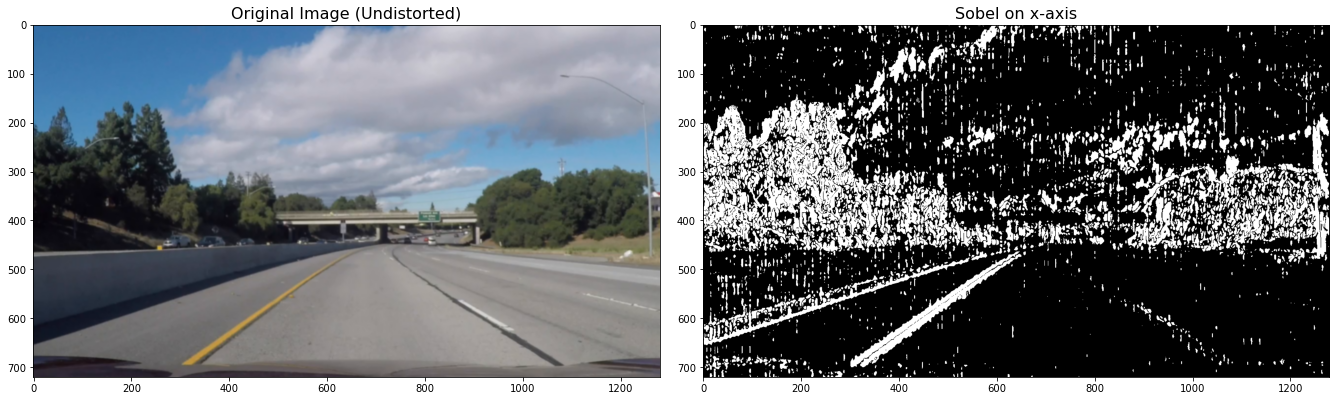

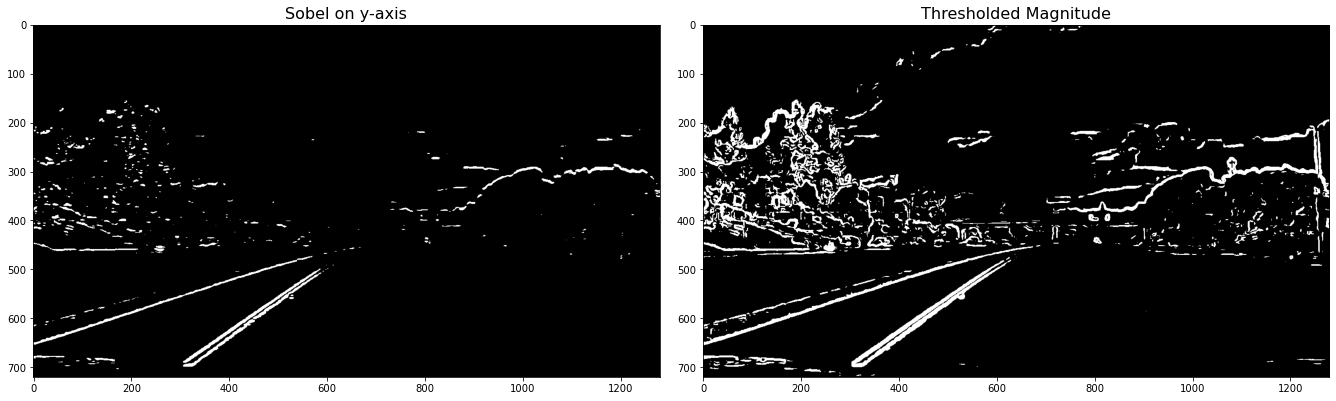

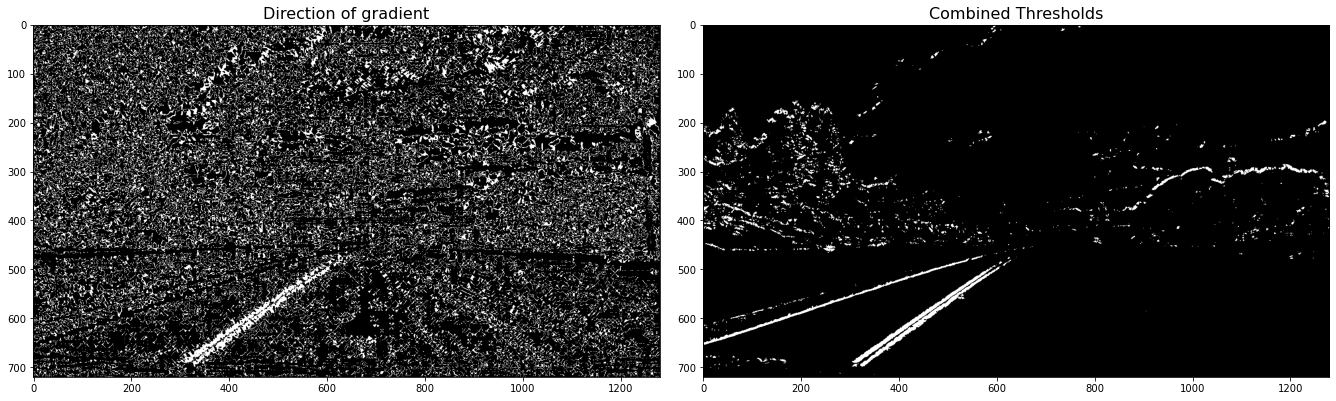

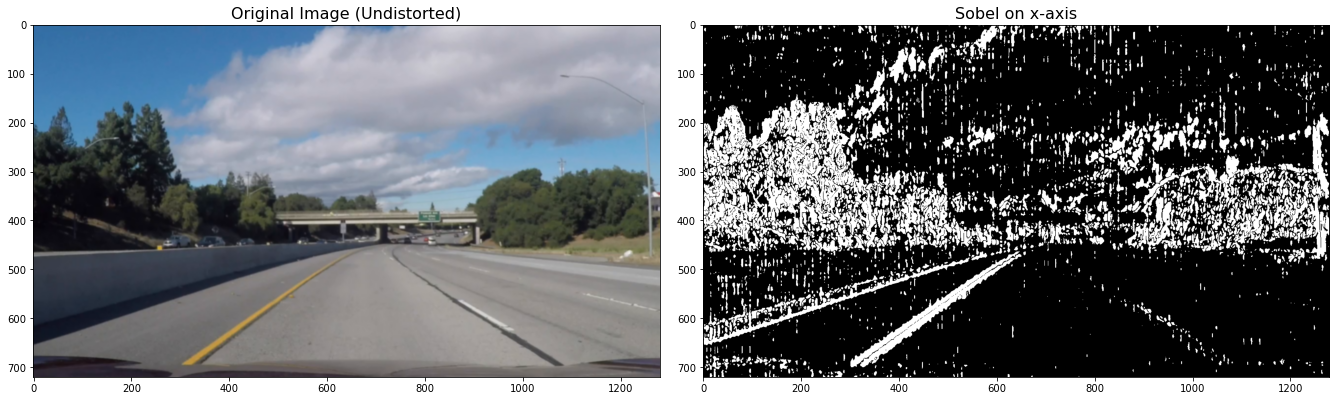

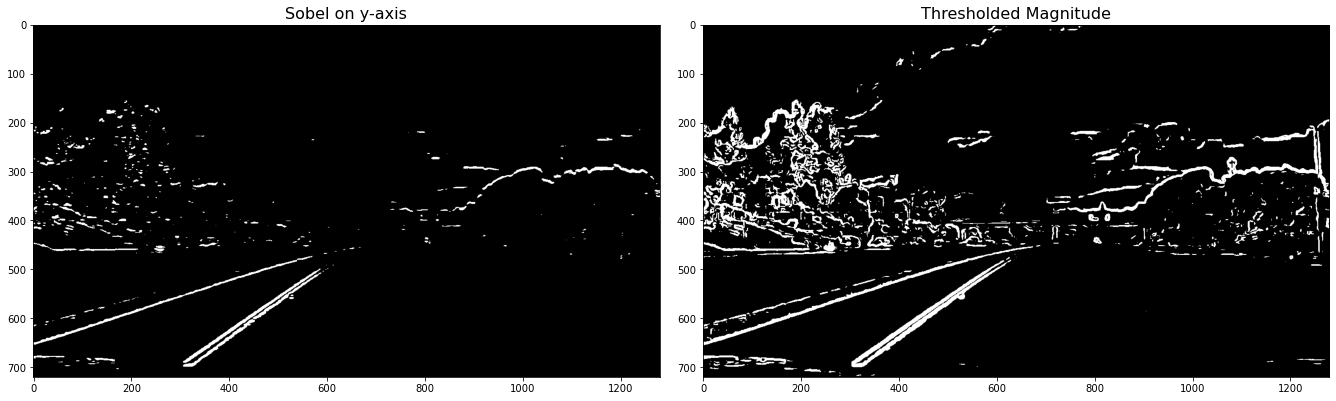

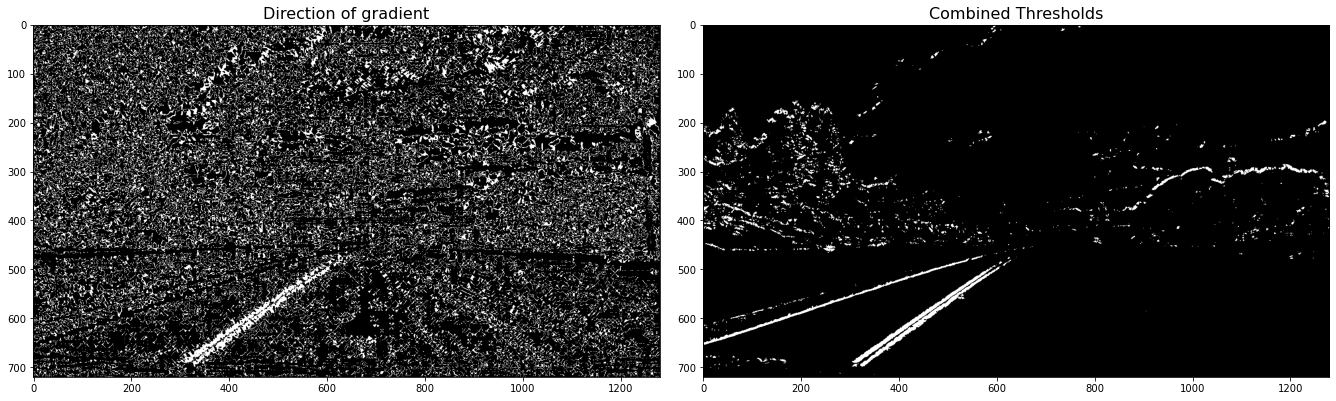

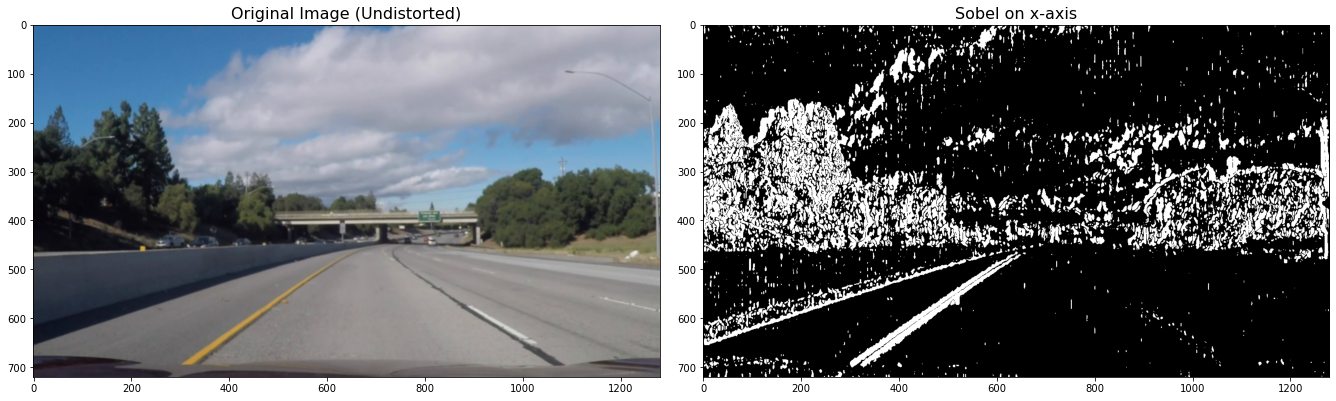

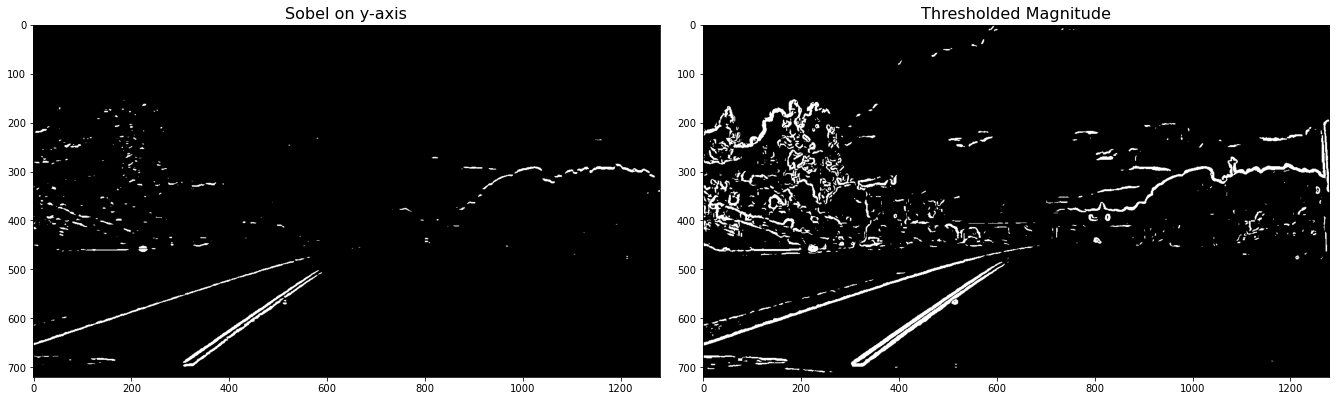

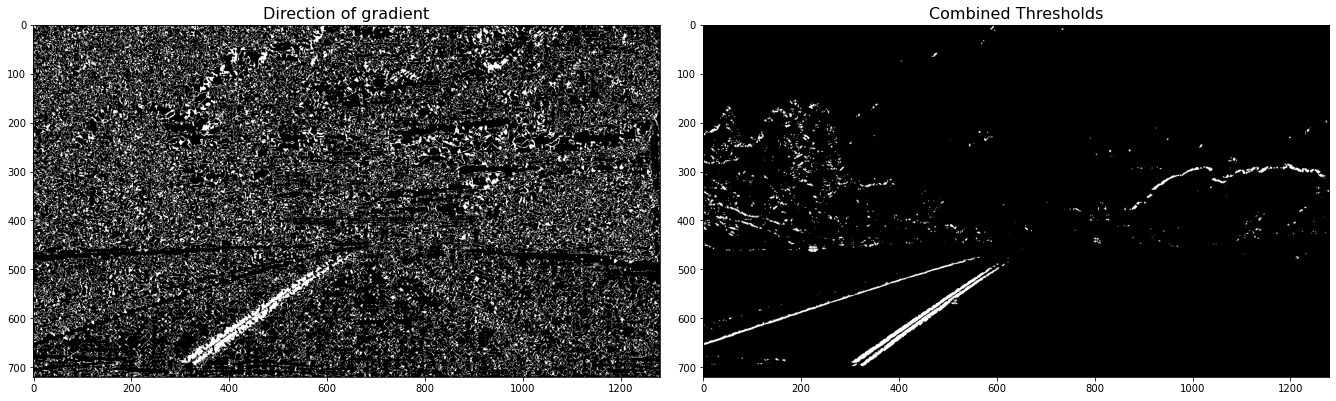

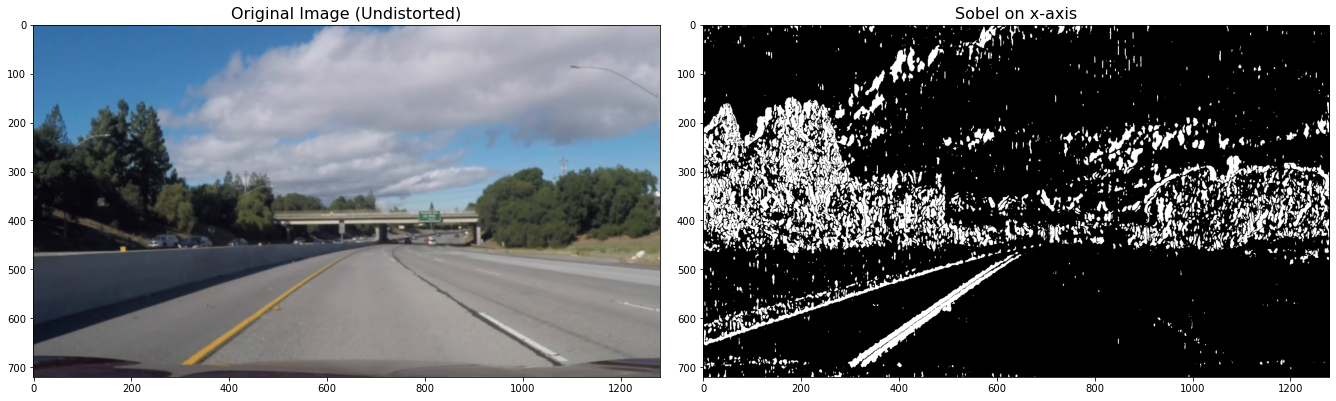

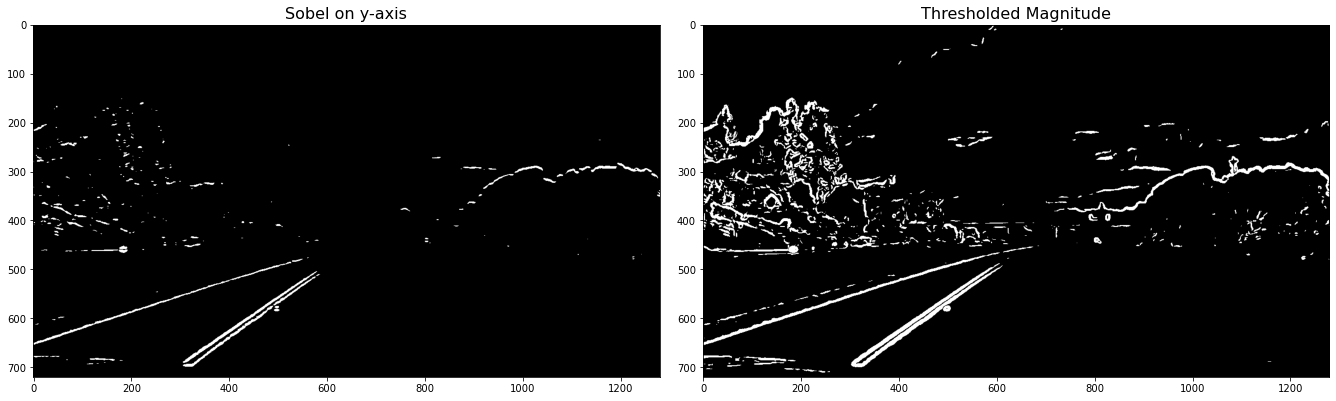

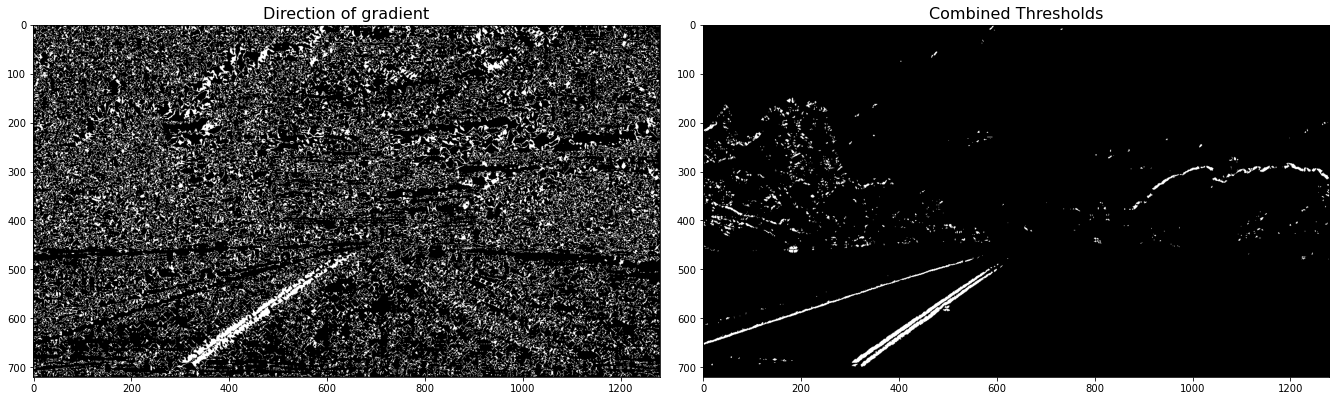

In [13]:
white_output = 'output_images/challenge_video.mp4'
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("challenge_video.mp4").subclip(0,0.1)
#clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))